In [31]:
# -*- coding: UTF-8 -*-
import jieba, collections, math

tf = {}
idf = {}
words_count = collections.defaultdict(int)
occurences_of_word = collections.defaultdict(int)
length_of_words = 0
length_of_articles = 0

stopwords = set()
f = open("stopwords-zh.txt", "r")
for word in f.readlines():
    stopwords.add(word[: -1])

articles = open("hw1-dataset.txt", "r")
for article in articles.readlines():
    words = jieba.lcut(article)
    length_of_words += len(words)
    length_of_articles += 1
    count = collections.defaultdict(int)

    for word in words:
        if (word not in stopwords):
            count[word] += 1
        
    for word, n in count.items():
        occurences_of_word[word] += 1
        words_count[word] += n
articles.close()

for word, n in words_count.items():
    tf[word] = n / length_of_words

for word, n in occurences_of_word.items():
    idf[word] = math.log(length_of_articles / n)

tf_idf = {}
for word, n in tf.items():
    tf_idf[word] = n * idf[word]

tf_idf = sorted(tf_idf.items(), key = lambda x: x[1], reverse = True)[: 100]

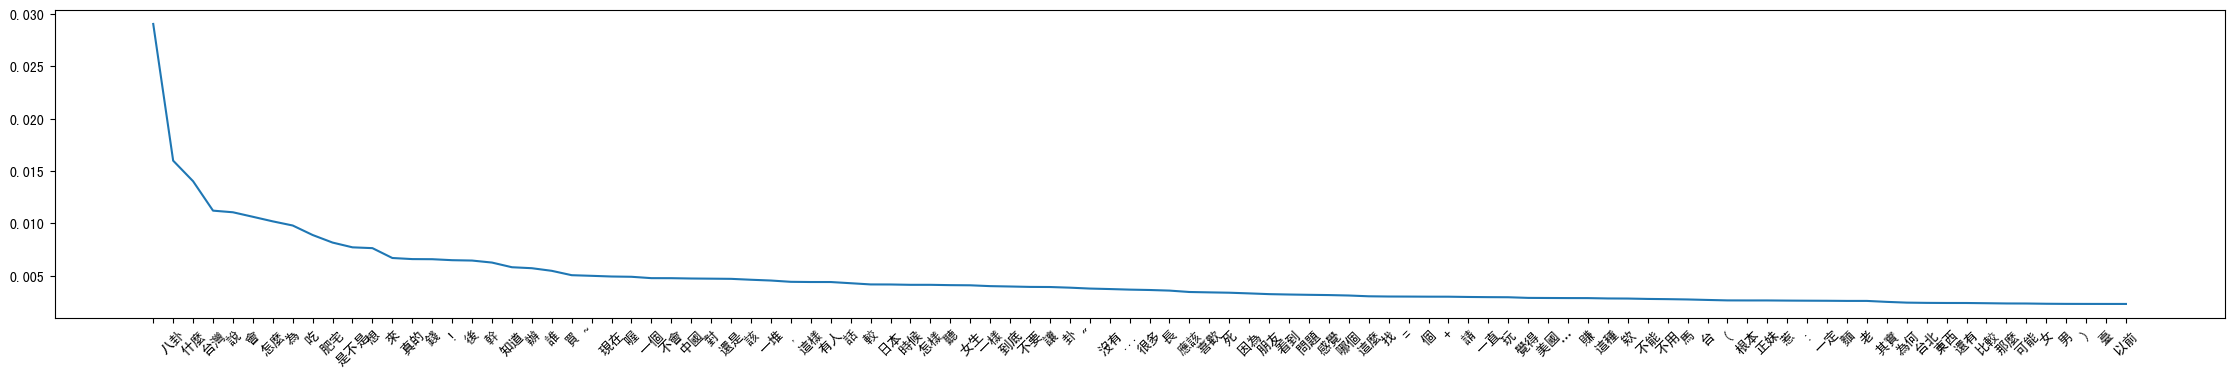

In [32]:
from matplotlib import pyplot as plt

plt.rcParams["font.sans-serif"] = "SimHei"

fig = plt.figure(figsize = (28, 4))
x = [w[0] for w in tf_idf]
y = [w[1] for w in tf_idf]
plt.plot(x, y)
plt.xticks(rotation = 45)
plt.show()

/opt/homebrew/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


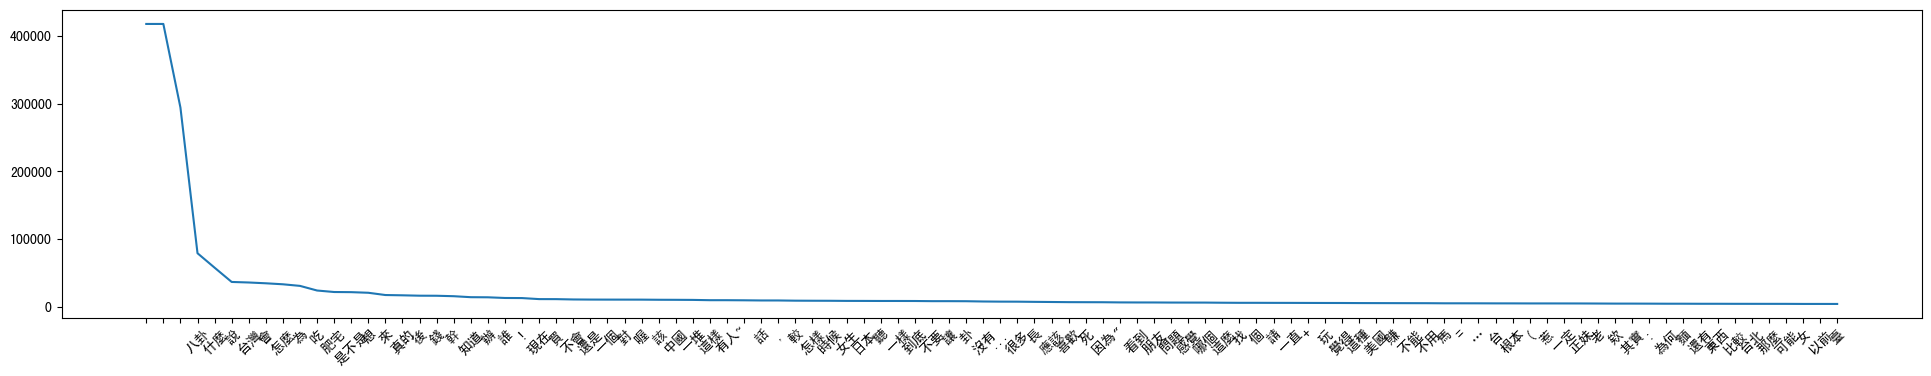

In [33]:
fig = plt.figure(figsize = (24, 4))
data = sorted(words_count.items(), key = lambda x: x[1], reverse = True)[: 100]
x = [d[0] for d in data]
y = [d[1] for d in data]
plt.plot(x, y)
plt.xticks(rotation = 45)
plt.show()

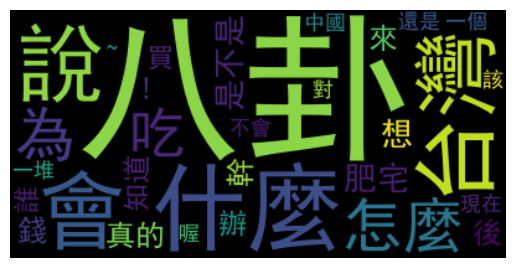

In [34]:
from wordcloud import WordCloud

freq = {}
for word, n in tf_idf[: 32]:
    freq[word] = n

wordcloud = WordCloud(font_path = "/Users/ming/.fonts/SimHei.ttf")
wordcloud.generate_from_frequencies(frequencies = freq)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()